In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import load_wine
from dython.nominal import associations

In [2]:
data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
y.name = 'wine_class'

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# Number of unique values of features
X.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
dtype: int64

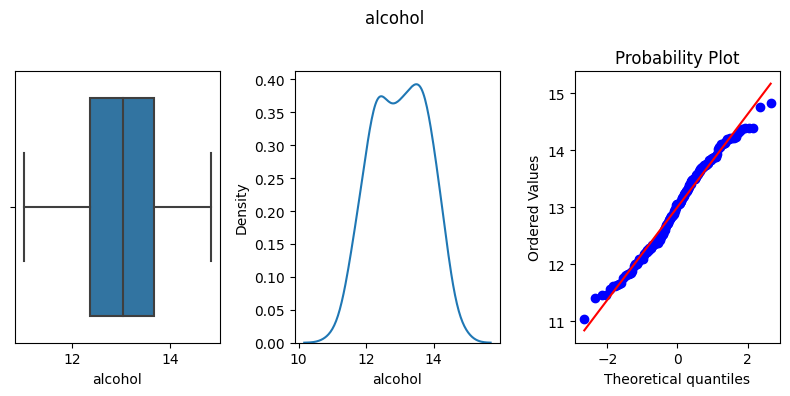

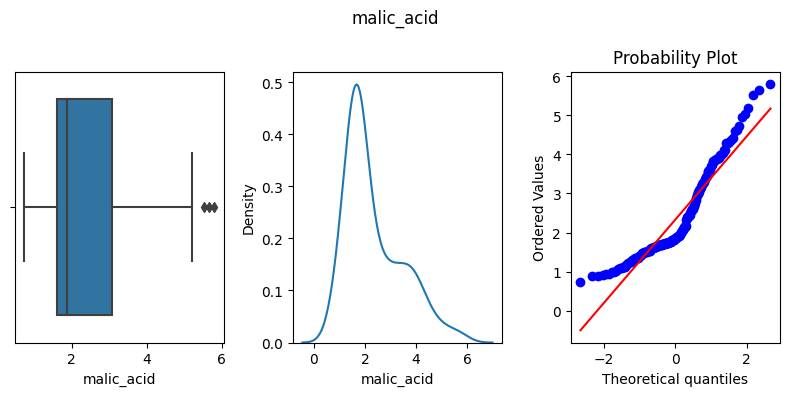

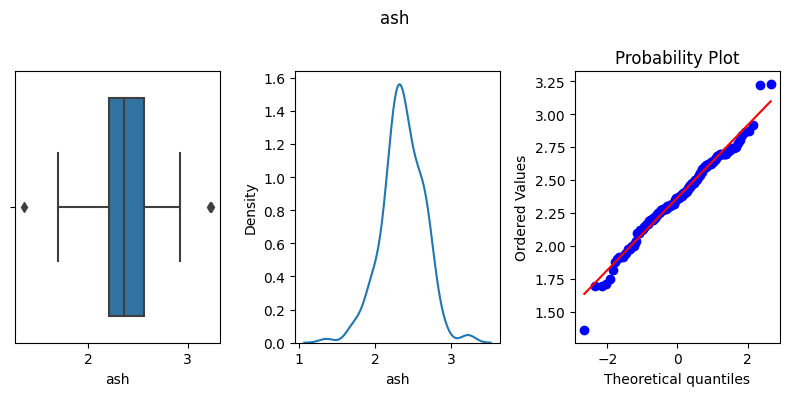

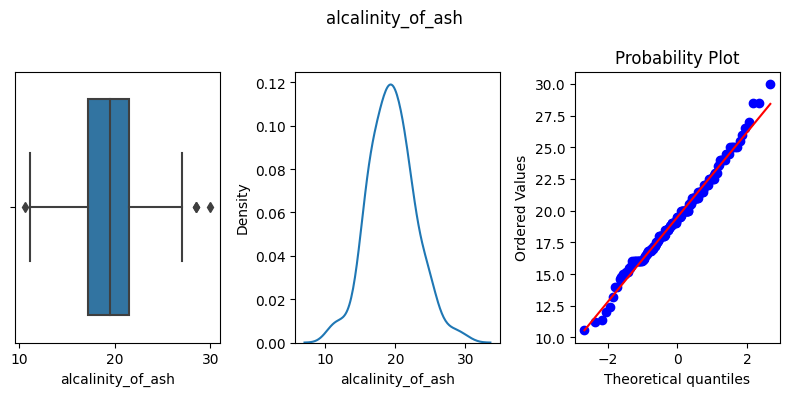

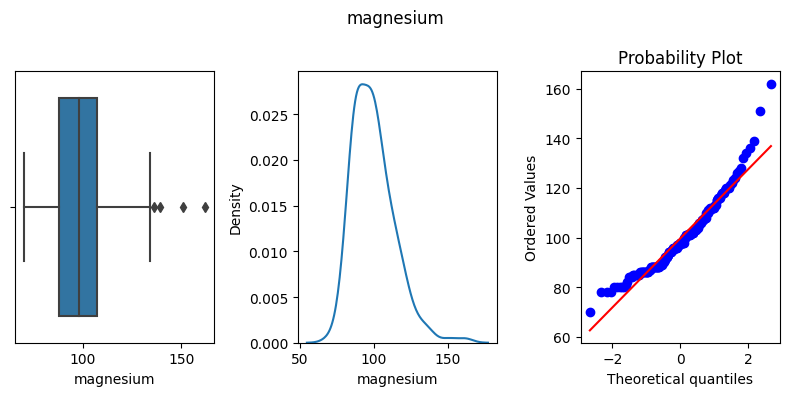

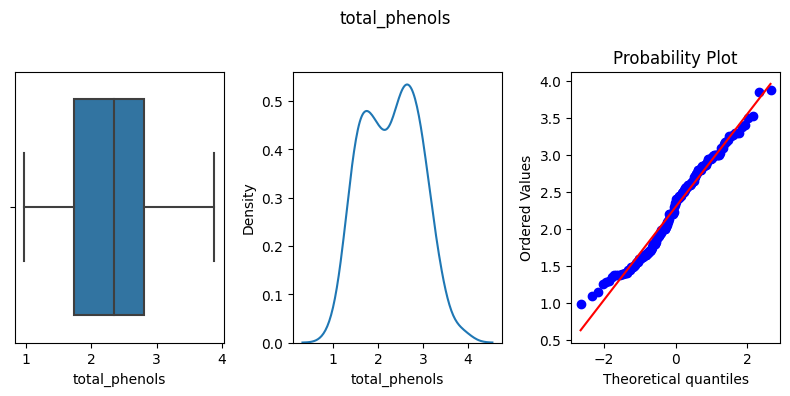

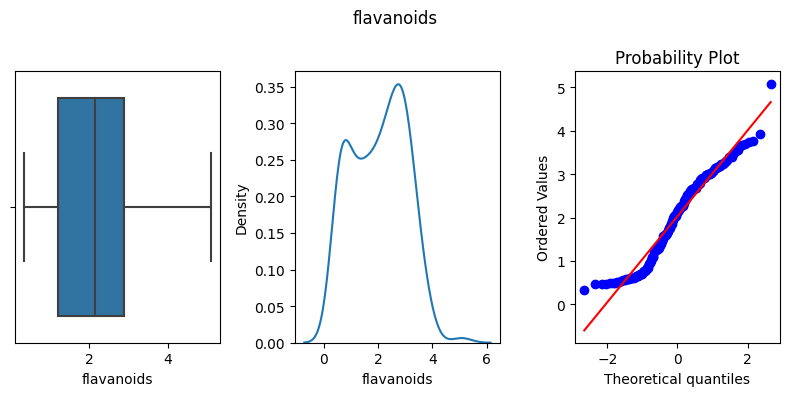

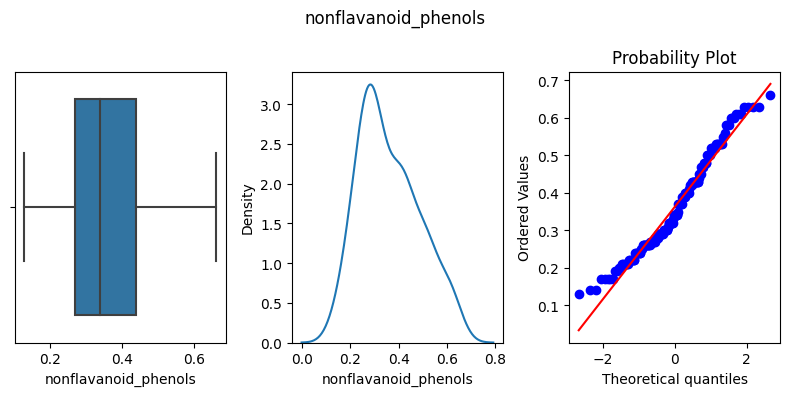

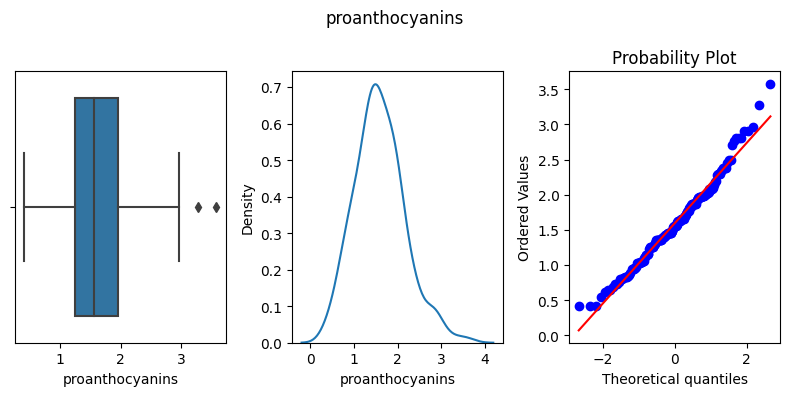

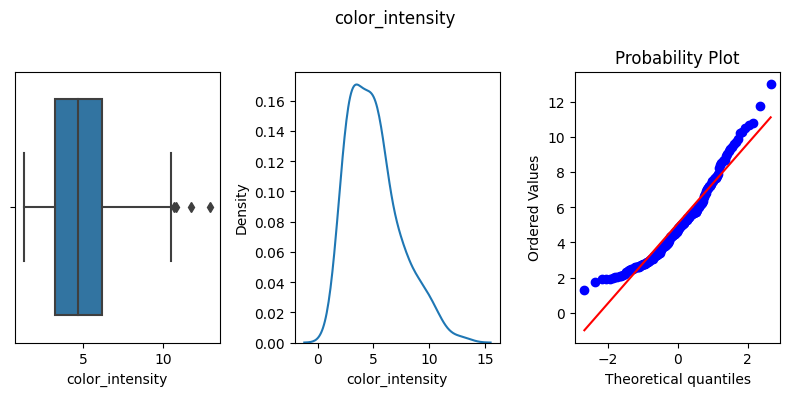

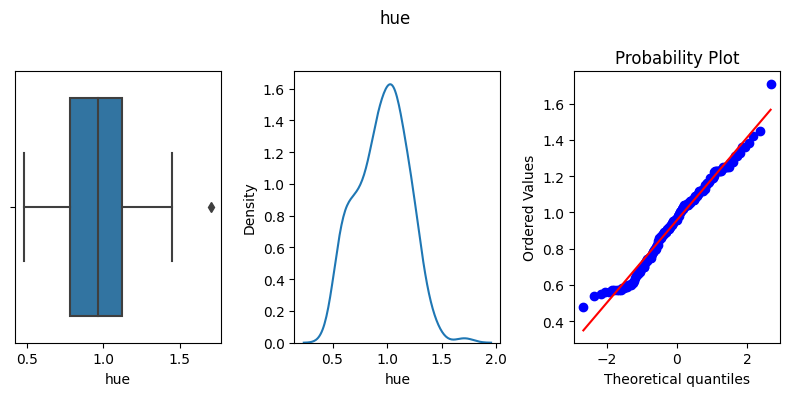

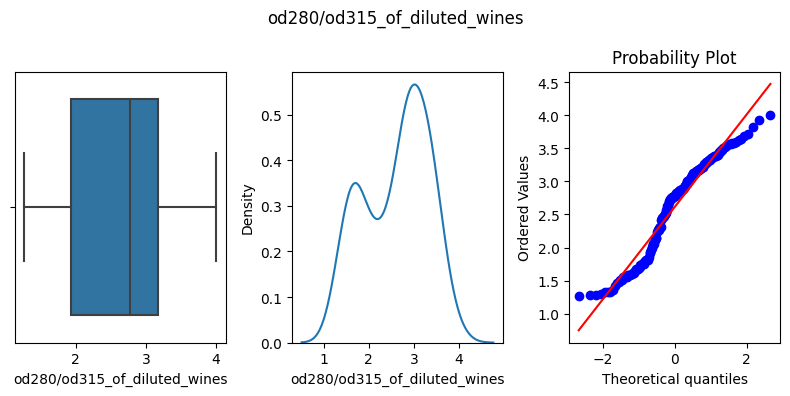

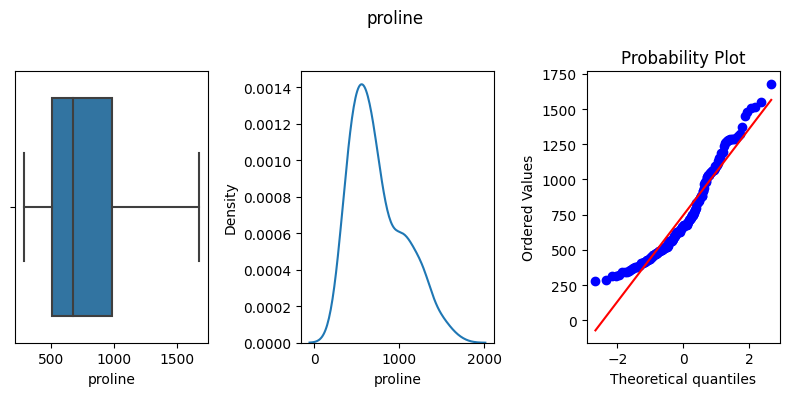

In [6]:
for col in X.columns:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
    sns.boxplot(x = X[col],ax=ax[0])
    sns.kdeplot(x = X[col],ax=ax[1])
    st.probplot(X[col],plot=ax[2])
    plt.suptitle(col)
    fig.tight_layout()
    plt.show()

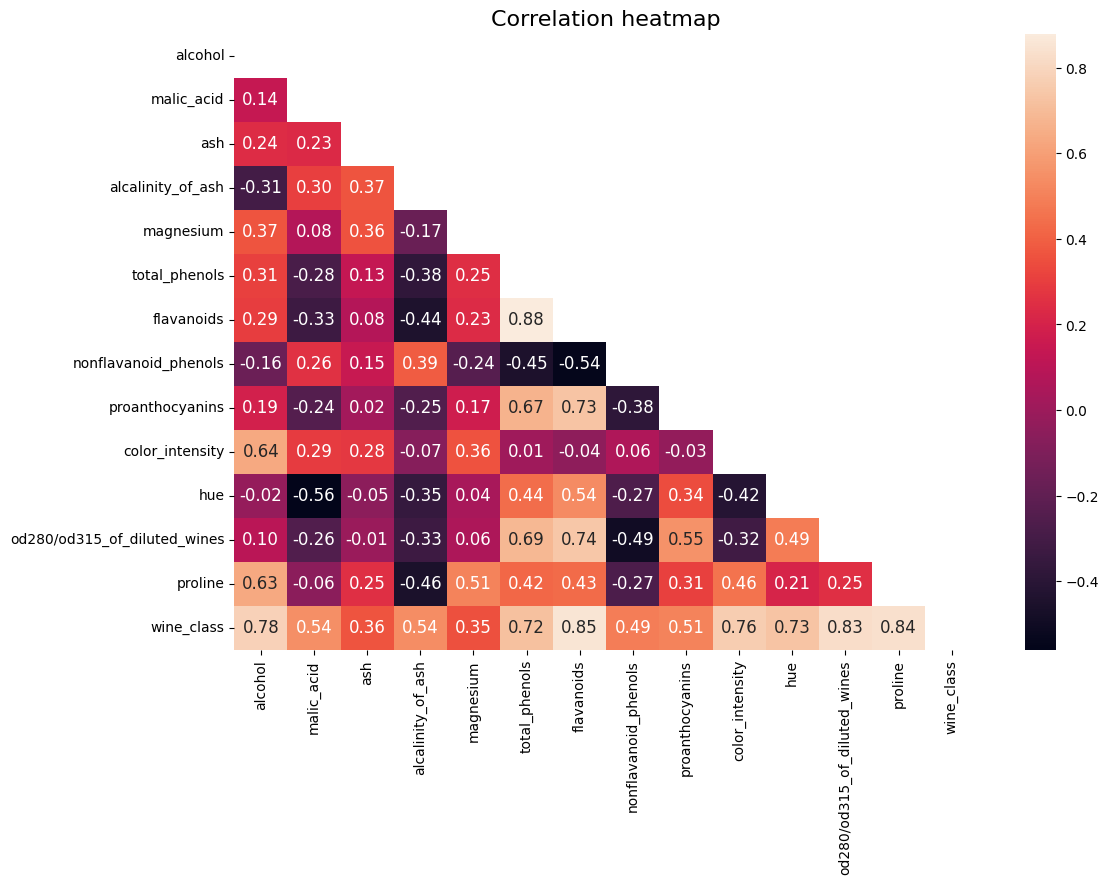

In [7]:
combined_data = pd.concat([X,y],axis=1)
r = associations(combined_data, num_num_assoc='spearman', compute_only=True, nominal_columns = ['wine_class'])
correlation = r['corr']
plt.figure(figsize=(12,8))
sns.heatmap(correlation.astype('float'), annot=True, mask = np.triu(np.ones_like(correlation.astype('float'), dtype=bool)),fmt='.2f',annot_kws={'fontsize':12})
plt.title('Correlation heatmap',size=16)
plt.show()

In [8]:
# Checking for duplicated rows
combined_data[combined_data.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class


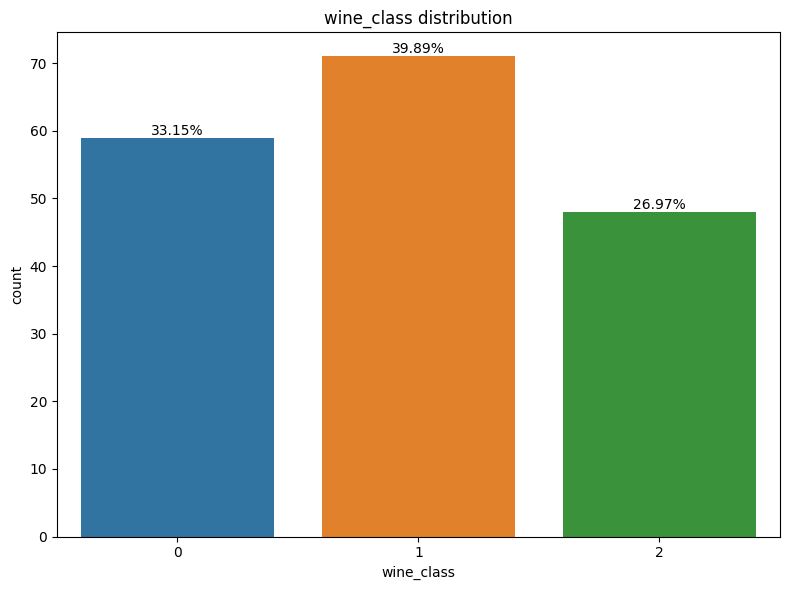

In [11]:
plt.figure(figsize=(8,6))
countplot = sns.countplot(data = combined_data, x = 'wine_class')
for rect in countplot.patches:
    height = rect.get_height()/len(X)*100
    plt.text(
        rect.get_x() + 0.5*rect.get_width(), rect.get_y()+rect.get_height(), '%.2f' % height + '%', ha='center', va='bottom')
plt.title(f'wine_class distribution')
plt.tight_layout()
plt.show()

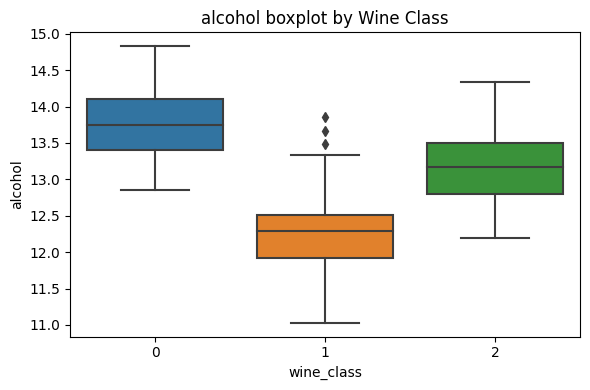

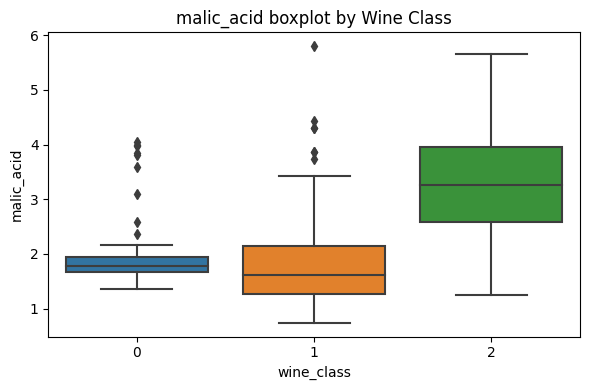

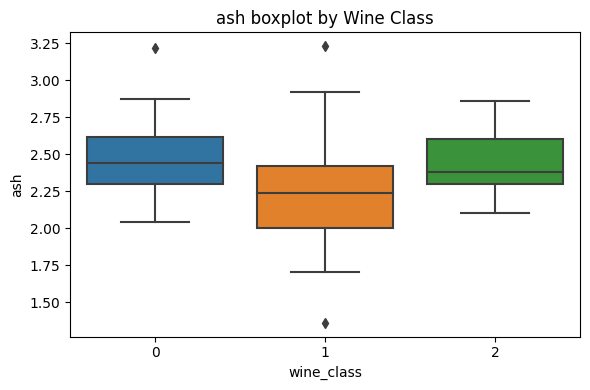

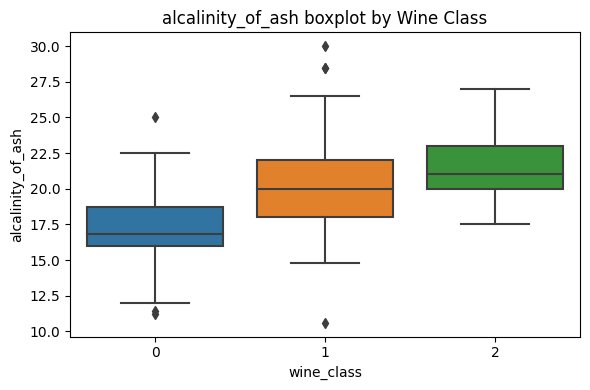

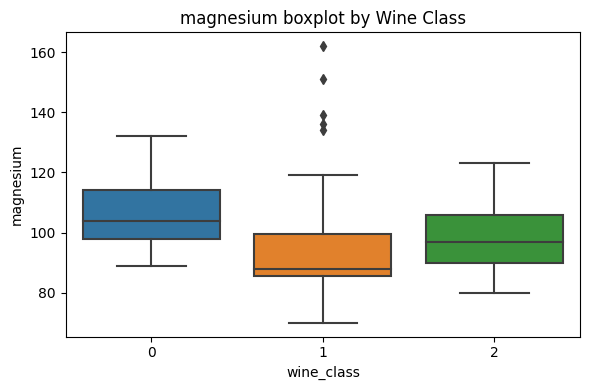

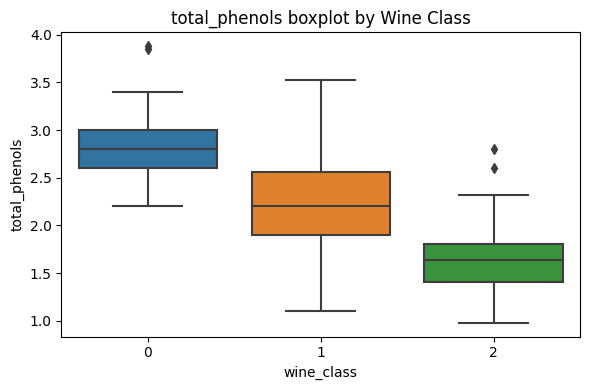

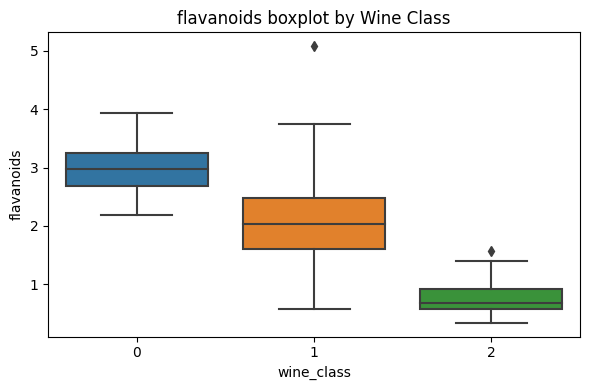

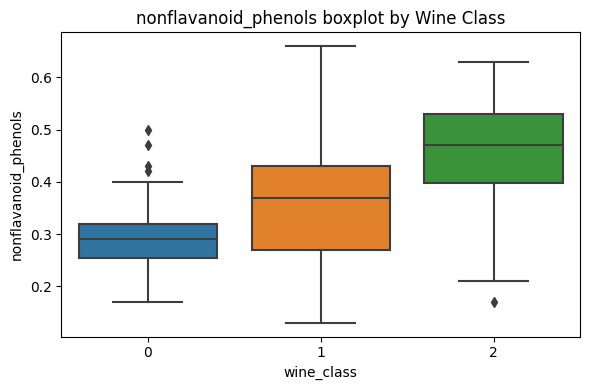

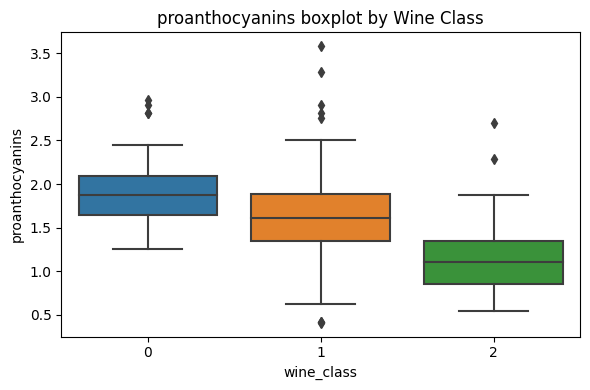

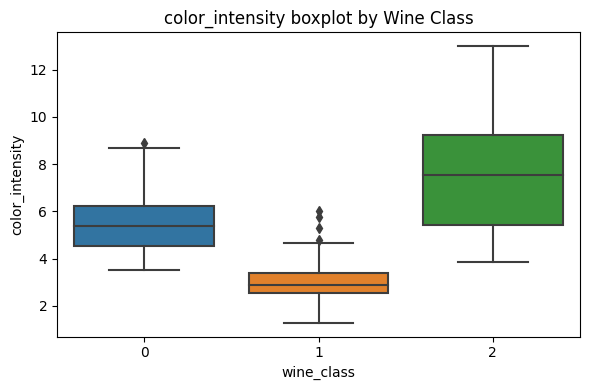

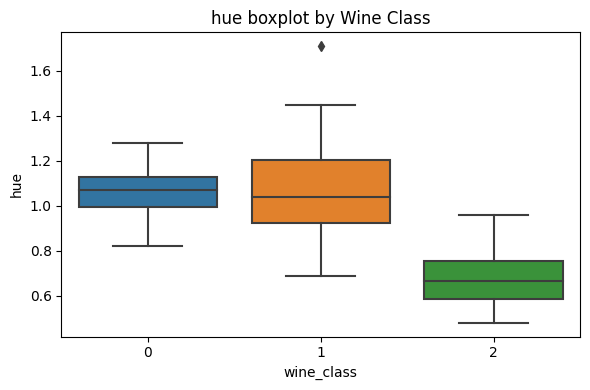

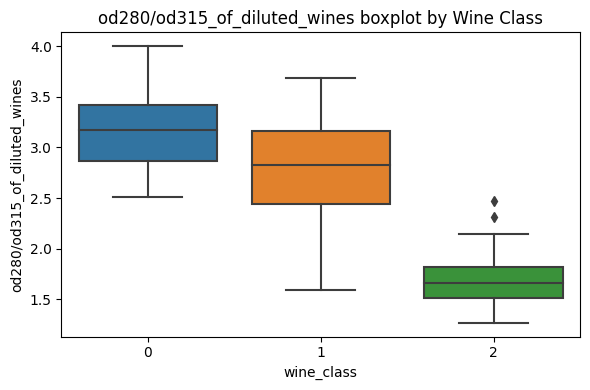

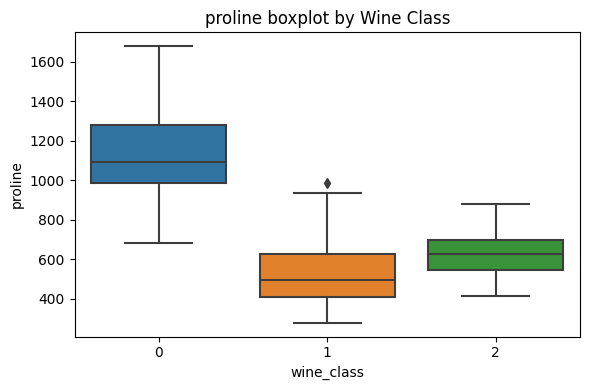

In [13]:
for col in combined_data.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data = combined_data, x = 'wine_class', y=col)
    plt.title(f'{col} boxplot by Wine Class')
    plt.tight_layout()
    plt.show()